# Blood Glucose Control - EDA

**Name:** [*Applicant name*]



### Import Data

There are multiple data sets each corresponding to a person with diabetes. Please load the files into a single data set while retaining the ability to distinguish between the PWD. 

In [4]:
import pandas as pd
import os

# get all csv files in the 'data' directory
# data_dir = 'data'
data_dir = os.path.join(os.getcwd(), '../', 'data')
csv_files = [f for f in os.listdir(data_dir) if f.endswith('.csv')]

# array to store the dfs
dfs = []

# read each csv and add a PWD id by the files last digits
for i, file in enumerate(csv_files):
    df = pd.read_csv(os.path.join(data_dir, file))
    # get the numbers in the file name
    file_digits_id = file.split("_")[-1].split(".")[0]
    # new pwd id
    df['PWD_ID'] = file_digits_id  
    dfs.append(df)

# combine all separate pwd to a single df
combined_df = pd.concat(dfs, ignore_index=True)

# first few rows and general statistics
print(combined_df.columns)
combined_df.head()
# print(combined_df.head())
# print(combined_df.info())

Index(['date', 'sender_id', 'bgl', 'bgl_date_millis', 'text', 'template',
       'msg_type', 'affects_fob', 'affects_iob', 'dose_units', 'food_g',
       'food_glycemic_index', 'dose_automatic', 'fp_bgl',
       'message_basal_change', '__typename', 'trend', 'PWD_ID'],
      dtype='object')


,date,sender_id,bgl,bgl_date_millis,text,template,msg_type,affects_fob,affects_iob,dose_units,food_g,food_glycemic_index,dose_automatic,fp_bgl,message_basal_change,__typename,trend,PWD_ID
0,2024-05-01 00:00:27.029000-05:00,NaN,114.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Reading,FLAT,500030
1,2024-05-01 00:05:27.183000-05:00,NaN,117.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Reading,FLAT,500030
2,2024-05-01 00:10:26.949000-05:00,NaN,113.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Reading,FLAT,500030
3,2024-05-01 00:15:27.180000-05:00,NaN,112.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Reading,FLAT,500030
4,2024-05-01 00:20:27.021000-05:00,NaN,113.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Reading,FLAT,500030


In [8]:
print(combined_df["msg_type"].unique())

[nan 'DOSE_INSULIN' 'ANNOUNCE_MEAL' 'INTERVENTION_SNACK'
 'DOSE_BASAL_INSULIN' 'BGL_FP_READING_CGM_CALIBRATION' 'NEW_TRANSMITTER'
 'NEW_SENSOR' 'ANNOUNCE_EXERCISE' 'TEXT' 'BGL_FP_READING' 'DOSE_MEDICINE'
 'NEW_PEN' 'BADGE' 'MEDICAL_TEST_RESULT']


### Two Data Visualizations

Create at least two visualizations that are of interest to you. They can be things that would be useful information for a PWD to know, or they could be useful for informing future modeling work. If you aren't sure what to visualize try recreating common diabetes data visualizations that you can find on the internet. 

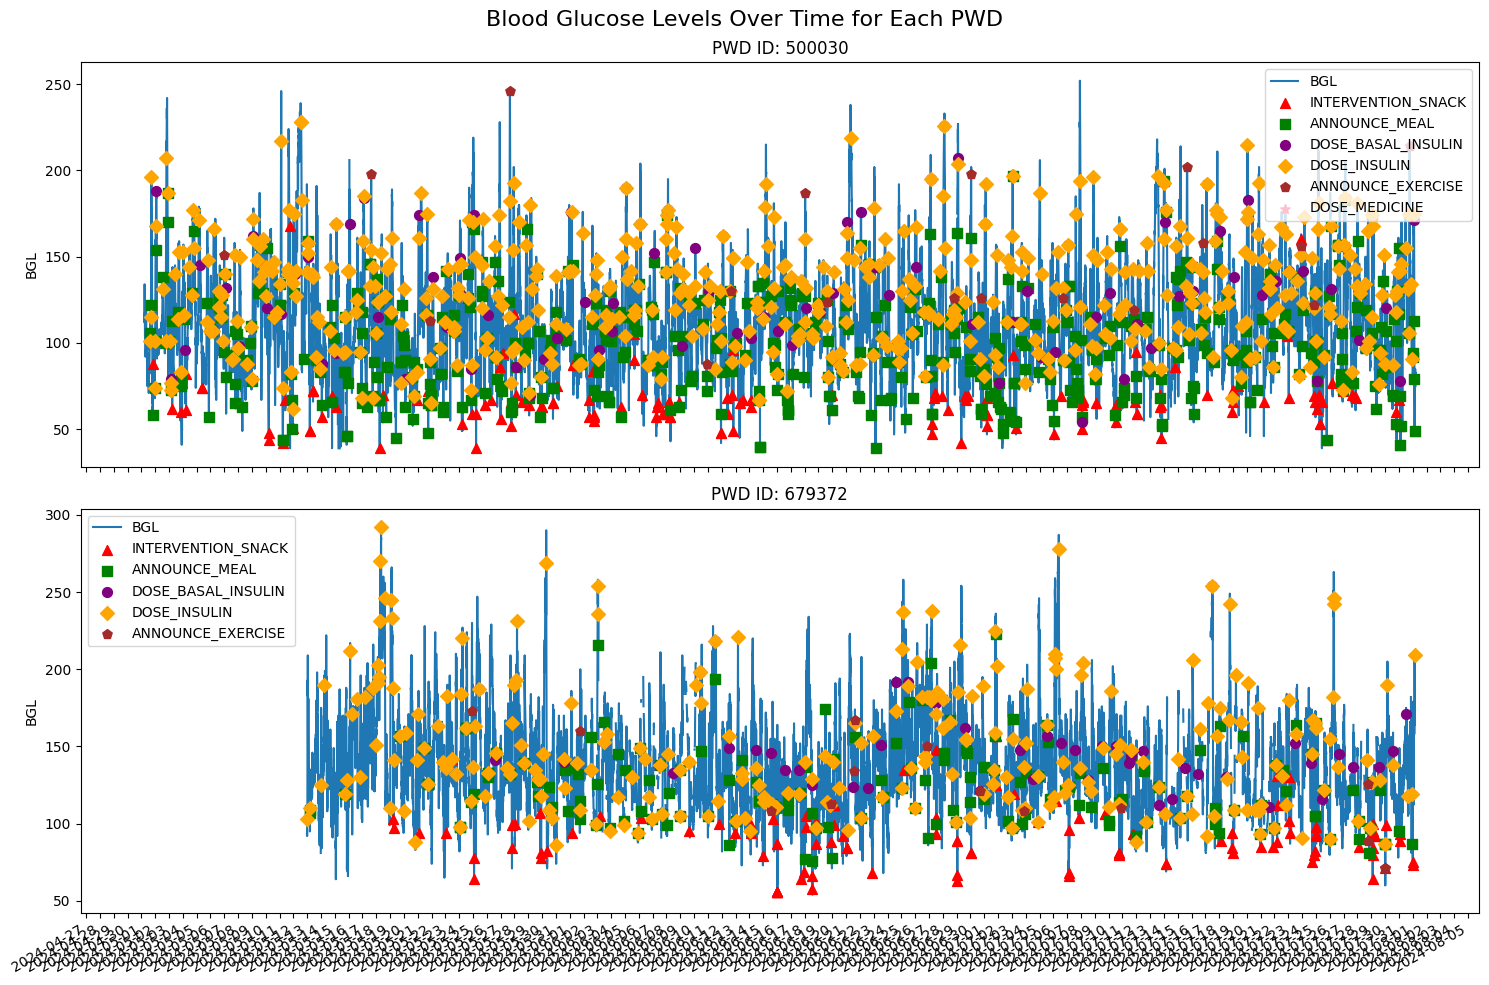

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.dates import DateFormatter
import matplotlib.dates as mdates

# Relevant msg types: INTERVENTION_SNACK, ANNOUNCE_MEAL, DOSE_BASAL_INSULIN, DOSE_INSULIN, ANNOUNCE_EXERCISE, DOSE_MEDICINE
relevant_msg_types = ["INTERVENTION_SNACK", "ANNOUNCE_MEAL", "DOSE_BASAL_INSULIN", "DOSE_INSULIN", "ANNOUNCE_EXERCISE", "DOSE_MEDICINE"]

# convert date column to datetime
combined_df['date'] = pd.to_datetime(combined_df['date'], format='mixed', utc=True)

# Get unique PWD_IDs
pwd_ids = combined_df['PWD_ID'].unique()

# set up the plot
fig, axes = plt.subplots(len(pwd_ids), 1, figsize=(15, 5*len(pwd_ids)), sharex=True)
fig.suptitle('Blood Glucose Levels Over Time for Each PWD', fontsize=16)

# define markers based on the event
markers = {
    "INTERVENTION_SNACK": "^",
    "ANNOUNCE_MEAL": "s",
    "DOSE_BASAL_INSULIN": "o",
    "DOSE_INSULIN": "D",
    "ANNOUNCE_EXERCISE": "p",
    "DOSE_MEDICINE": "*"
}

# define colors for each event type
colors = {
    "INTERVENTION_SNACK": "red",
    "ANNOUNCE_MEAL": "green",
    "DOSE_BASAL_INSULIN": "purple",
    "DOSE_INSULIN": "orange",
    "ANNOUNCE_EXERCISE": "brown",
    "DOSE_MEDICINE": "pink"
}

def plot_event_markers(axes, pwd_data, pwd_index):
    """
    Plots the markers on top of the time series plot
    ---
    Params:
        axes: the matplotlib axes to plot the markers on
        pwd_data: the timeseries data for the pwd
        pwd_index: the internal index for the pwd data
    """
    for msg_type in relevant_msg_types:
        events = pwd_data[pwd_data['msg_type'] == msg_type]
        if not events.empty:
            axes[pwd_index].scatter(events['date'], events['bgl'], 
                            marker=markers[msg_type], s=50, label=msg_type, color=colors[msg_type], zorder=2) #markers on top of plot

# plot for each PWD_ID
for i, pwd_id in enumerate(pwd_ids):
    pwd_data = combined_df[combined_df['PWD_ID'] == pwd_id]
    
    # plot the blood glucose
    axes[i].plot(pwd_data['date'], pwd_data['bgl'], label='BGL', zorder=1)
    
    # now mark relevant events (as per relevant_msg_types), using the marker definitions provided in the dict above
    plot_event_markers(axes, pwd_data, pwd_index=i)
    axes[i].set_ylabel('BGL')
    axes[i].set_title(f'PWD ID: {pwd_id}')
    axes[i].legend()
    
    # format x-axis
    axes[i].xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
    axes[i].xaxis.set_major_locator(mdates.DayLocator(interval=1))
    
# rotate and align the tick labels so they look better
plt.gcf().autofmt_xdate()

# add a bit more space between subplots
plt.tight_layout()

# show the plot
plt.show()


### Ask a question(s) about the data and/or diabetes!
When creating the visualizations you probably had some questions about managing T1D. Ask some questions that might interest you and our diabetes experts will do their best to answer them for you! *Consider this an AMAA about diabetes.* 

1. An individual with T1D will not be able to produce insulin effectively. So while managing T1D, is there more emphasis placed on meal timings (i.e when you *should* eat your meals), or the post-meal insulin dosage? 
2. Based on the plot, it seems as though the insulin dosage timings vary quite a lot. From my understanding, having a meal will increase BGL; this is when insulin could be dosed to reduce BGL. How are the timings of insulin dosage determined? Would this depend on the meal size (eg: thanksgiving dinner vs an average dinner)? 

### Final Task

Thanks for showing interest in our project! We plan to incorporate the best/most interesting visualizations into a substack post in the future. 

Please remember to create a pull request with your updated template, don't forget to rename the file to something that we can identify you with, e.g: `eda_[your_name].ipynb`